### A

### 1)
    One research question would be:
    
    Is it possible to train a natural language processing model to evaluate sentiment of user reviews after it has been trained on the IMDB data set?


### 2)
    The goals of this data analysis are to create a natural language processing neural network that can analyze sentiment of user reviews. We can then predict how a customer feels about our products based on the language used in a product review. Another goal is to evaluate the accuracy of the model.

### 3)

    One neural network type capable of performing text classification is a long short term memory network or LSTM. They can remember previous inputs which may help them understand the context of the text being analyzed.

### B

### 1)

   ###   Presence and removal of unusual characters.

       here we will print out a set of unique special characters found in the data set. We will then remove them from the data set. We will clean the data first by handling missing values and removing duplicate rows.
    

In [1]:
#import libraries and read in the data from file.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

file_path = '/home/dj/skewl/D213/2/sentiment labelled sentences/imdb_labelled.txt'
pd.set_option('display.max_columns', None)
# Read the data from the CSV file into a DataFrame
df1 = pd.read_csv(file_path, delimiter='\t',header=None, names=['Reviews','Sentiment'])

file_path = '/home/dj/skewl/D213/2/sentiment labelled sentences/amazon_cells_labelled.txt'
pd.set_option('display.max_columns', None)
# Read the data from the CSV file into a DataFrame
df2 = pd.read_csv(file_path, delimiter='\t',header=None, names=['Reviews','Sentiment'])

file_path = '/home/dj/skewl/D213/2/sentiment labelled sentences/yelp_labelled.txt'
pd.set_option('display.max_columns', None)
# Read the data from the CSV file into a DataFrame
df3 = pd.read_csv(file_path, delimiter='\t',header=None, names=['Reviews','Sentiment'])
#concatenate files

df = pd.concat([df1,df2,df3])

#print special characters

# Define a regex pattern to detect special characters
# This pattern includes punctuation, symbols, whitespace, and non-ASCII characters
pattern = re.compile(r"[^a-zA-Z0-9\s]")  # Matches any character not a-z, A-Z, 0-9, or space
character_pattern = re.compile(r"[\s+[a-zA-Z]\s+")
space_pattern = re.compile(r"\s+")
tag_pattern = re.compile(r"<[^>]+>")


# Function to find and extract special characters from a given text
def extract_special_characters(text):
    special_chars = pattern.findall(text)  # Find all special characters
    return set(special_chars)  # Return as a set to avoid duplicates
special_chars_set = set()
# Find and print special characters in the DataFrame
for idx, row in df.iterrows():
    text = row["Reviews"]
    special_chars_set |= extract_special_characters(text)  # Get special characters from the text
    if special_chars_set:
        row  = re.sub(pattern, "", text)
        df.loc[idx, "Reviews"] = row
    
print(special_chars_set)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'.', 'å', ']', '+', '%', ':', '[', '/', '"', ';', '\x96', '?', 'é', '*', 'ê', ',', '-', '\x97', "'", ')', '(', '$', '&', '!', '#'}


### Handle missing values and check for duplicates.

In [2]:
# Find duplicate rows 
duplicate_rows = df.duplicated().sum()
# Print duplicate rows   # found NO duplicate rows here!
print(duplicate_rows)
df = df.drop_duplicates()
# Identify missing values using isna() method
missing_values = df.isna().sum()
# Print DataFrame with True for missing values and False for non-missing values
print(missing_values)

# no missing values here!

1081
Reviews      0
Sentiment    0
dtype: int64


### determine vocabulary size.

    From the keras tokenizer below we can see the vocabulary size is 2081. This provides us with the number of unique words in the data set.

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer


# Initialize the tokenizer with a maximum vocabulary size (optional)
tokenizer = Tokenizer(num_words=None, lower=True, oov_token="<OOV>")

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(df['Reviews'].tolist())

# Get the vocabulary size
vocabulary_size = len(tokenizer.word_index)  # Get the number of unique words

print("Vocabulary Size:", vocabulary_size)

2024-05-10 19:51:16.416214: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 19:51:16.418898: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 19:51:16.449321: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 19:51:17.089665: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Vocabulary Size: 2081


### The proposed embedding length is 8.

    This value was determined by taking the fourth root of the vocabulary size. This represents the number of binary vectors representing each word. Since this model is being used for sentiment analysis it may benefit from a higher embedding length. This value can be changed later as a parameter when fitting the model.

In [4]:
max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocabulary_size)), 0))
print(max_sequence_embedding)

7


### I chose 32 to be the maximum sequence length.

    From the code below we can see that the maximum number of words in any review is 32. This is helpful so our model does not truncate any sentences and preserves the input data.

In [5]:

# Calculate the maximum sequence length
max_sequence_length = df["Reviews"].apply(lambda x: len(x.split())).max()

print("Maximum Sequence Length:", max_sequence_length)

Maximum Sequence Length: 32


### 2) 

    Goals of the tokenization process are separate the text into smaller chunks called tokens. Another goal is to lemmatize the words or reduce them to the root form of the word. Lastly tokenization will pad all the sequences so each sequence is the maximum sequence length.

    The library tensorflow.keras.preprocessing.text.Tokenizer will be used for the tokenization of the reviews in the data set. keras.preprocessing.sequence import pad_sequences will be used to add padding to each sequence.

In [6]:
from keras.preprocessing.sequence import pad_sequences
# Initialize the tokenizer with a maximum vocabulary size (optional)
tokenizer = Tokenizer(num_words=None, lower=True, oov_token="<OOV>")

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(df['Reviews'].tolist())

# Tokenize text data
sequences = tokenizer.texts_to_sequences(df['Reviews'].tolist())

# Apply padding
max_sequence_length = 1384  #  maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')


### 3)
    The padding process will add zeroes to the end of each sequence that does not already contain the maximum number of words which is set to 1384. See below for a single padded sequence.

In [7]:
print(padded_sequences[0])

[395 156   9 ...   0   0   0]


### 4)
    There will be two categories of sentiment used for this model. The sigmoid function will be used as the activation function for the final dense layer of the network.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.array(df['Sentiment']))
num_classes = len(label_encoder.classes_)
# Split the data into training and temporary sets (50% training, 50% temporary)
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y_encoded, test_size=0.5, random_state=42)

# Split the temporary set into testing and validation sets (25% training, 25% validation)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
# write data to file
pd.DataFrame(x_train).to_csv("x_train.csv")
pd.DataFrame(y_train).to_csv("y_train.csv")

pd.DataFrame(x_test).to_csv("x_test.csv")
pd.DataFrame(y_test).to_csv("y_test.csv")

pd.DataFrame(x_val).to_csv("x_val.csv")
pd.DataFrame(y_val).to_csv("y_val.csv")
#print length of each set
print(len(x_train))
print(len(x_test))
print(len(x_val))

833
417
417


### C

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
# Define the neural network architecture
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 8

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)


model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(num_classes, activation='sigmoid')) # Output layer with sigmoid activation for multi-class classification
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_val_categorical = to_categorical(y_val, num_classes=num_classes)
history = model.fit(x_train, y_train_categorical, epochs=10, batch_size=32, validation_data=(x_val, y_val_categorical),callbacks=[early_stopping])

# Evaluate the model on the testing data
y_test_categorical = to_categorical(y_test, num_classes=num_classes)
loss, accuracy = model.evaluate(x_test, y_test_categorical)
print("Test Accuracy:", accuracy)


Epoch 1/10


/home/dj/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - accuracy: 0.4958 - loss: 0.6940 - val_accuracy: 0.4796 - val_loss: 0.6967
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.4930 - loss: 0.6956 - val_accuracy: 0.4796 - val_loss: 0.6943
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 0.5350 - loss: 0.6920 - val_accuracy: 0.4796 - val_loss: 0.6938
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 315ms/step - accuracy: 0.5282 - loss: 0.6925 - val_accuracy: 0.4796 - val_loss: 0.6936
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 308ms/step - accuracy: 0.5111 - loss: 0.6927 - val_accuracy: 0.4796 - val_loss: 0.6956
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.5075 - loss: 0.6935 - val_accuracy: 0.4796 - val_loss: 0.6942
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.5252 - loss: 0.6921 - val_accuracy: 0.4796 - val_loss: 0.6959
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 9

### 1)
 ### model summary

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1384, 8)        │        16,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,176 (1020.22 KB)

 Trainable params: 87,058 (340.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 174,118 (680.15 KB)

### 2)

    The number of layers in my model is 3 total. 1 embedding layer, 1 LSTM layer, and 1 dense layers. The embedding layer converts word indices to dense vectors. The LSTM layer processes the sequential input. The dense layers produce the final output. The total numbers of parameters in my model is 261,212.


### 3)

      The activation function I chose is the sigmoid function. I chose this because it is commonly used in the output layer for binary classification problems which is what sentiment analysis is for this project. The number of nodes for the input layer I chose is the vocab size which is the dimensionality of the input data. The LSTM layer nodes were chosen by experimenting with powers of 2 such as 128, 256, and so forth. Anything over 128 seemed to reduce the model accuracy so I stuck with 128. The number of nodes used for the dense layer is equal to the number of output classes which is two in this case. I used binary cross-entropy for my loss function because it is best suited for binary classification. I used 'adam' for the optimizer function because it combines some benefits of AdaGrad and RMSProp. It is also effective for training many different deep learning models. I used early stopping with a patience of 3 for my stopping criteria. I chose this because it will stop the model from training when the model performance is not improving after 3 epochs which will save time in fitting the model. I chose accuracy as an evaluation metric because it measures the proportion of correctly classified instances in the data set which is important for binary classification.


### D)

### 1)
    Using early stopping with a patience of 3 will stop the model from training after 3 epochs that do not improve the model accuracy. This is helpful because it saves time and can prevent overfitting. See final epoch below.


In [11]:
history = model.fit(x_train, y_train_categorical, epochs=10, batch_size=32, validation_data=(x_val, y_val_categorical),callbacks=[early_stopping])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.5382 - loss: 0.6927 - val_accuracy: 0.4796 - val_loss: 0.6934
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.4797 - loss: 0.6933 - val_accuracy: 0.4796 - val_loss: 0.6932
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - accuracy: 0.5153 - loss: 0.6929 - val_accuracy: 0.4796 - val_loss: 0.6953
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.5243 - loss: 0.6933 - val_accuracy: 0.4796 - val_loss: 0.6947
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.5375 - loss: 0.6920 - val_accuracy: 0.4796 - val_loss: 0.6943
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


### 2)

    My model has an accuracy of approximately .5216 which means that the model is not fit very well. Some actions I took to address overfitting are simplifying the model by reducing the number of layers. This improved the accuracy. Another action I took was to utilize early stopping which prevents overfitting by stopping training when it no longer increases the accuracy of the model.

### 3)
    Visualizations of training process.

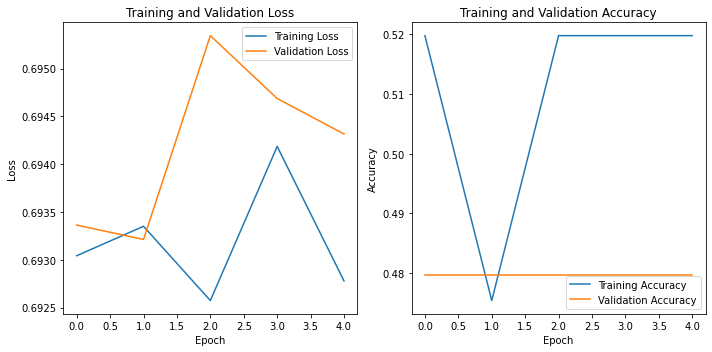

In [12]:
# Plot training history
def plot_training_history(history):
    # Get training and validation metrics
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)


### 4)

    The evaluation metric I chose is accuracy. This is defined as the number of correct predictions divided by the total number of predictions. The accuracy of this model is approximately .52.


### E
    
    This will save the model to the filepath every time validation loss improves during training.

In [13]:
from keras.callbacks import ModelCheckpoint
# Define the filepath for saving the model
filepath = "model_checkpoint.h5.keras"
# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Assuming 'model' is your Keras model and you are using model.fit() for training
# Include the checkpoint callback in the list of callbacks passed to model.fit()
model.fit(x_train, y_train_categorical, validation_data=(x_val, y_val_categorical), epochs=10, batch_size=32, callbacks=[checkpoint])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.5534 - loss: 0.6927
Epoch 1: val_loss improved from inf to 0.69422, saving model to model_checkpoint.h5.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step - accuracy: 0.5522 - loss: 0.6927 - val_accuracy: 0.4796 - val_loss: 0.6942
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.5136 - loss: 0.6930
Epoch 2: val_loss improved from 0.69422 to 0.69352, saving model to model_checkpoint.h5.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 0.5138 - loss: 0.6930 - val_accuracy: 0.4796 - val_loss: 0.6935
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.5158 - loss: 0.6929
Epoch 3: val_loss did not improve from 0.69352
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 308ms/step - accuracy: 0.5159 - loss: 0.6929 - val_accuracy: 0.4796 - val_loss: 0.6948
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.5187 - loss: 0.6922
Epoch 4: val_loss did not improve from 0.69352
27/27 ━━━━━━━━━━━━━━━━━━━━ 

### F
    The network architecture I chose for my neural network seemed to be the most suitable for binary classification. The sigmoid activation function, the binary cross-entropy loss function, the number of nodes in the dense layer, and a stop function based on accuracy, are all network architecture decisions that should have created a model that had a high accuracy when solving binary classification problems. However, the accuracy only reached about 50%. Based on the accuracy the functionality of my model is poor. My model only correctly predicts the sentiment of a review 50% of the time which is not useful. Given sufficient time for trial and error I think that this could be improved. 


### G

     A course of action based on my results is to focus on acquiring more training data and adjusting the network architecture of the model. I think that 50% accuracy is unacceptable for production use. I would like to see at least 75% accuracy before the company can use this to predict the sentiment of user reviews. 